#### Problem Statement: 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step-1 Importing Libraries 

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Step-2: Reading and understanding dataset

In [16]:
#reading csv using pandas

bike_df=pd.read_csv('day.csv')

In [17]:
#inspecting few rows
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
#checking shape
bike_df.shape

(730, 16)

In [19]:
# checking dataframe for datatype and null values
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observations: 
- There are Total 730 rows and 16 columns in provided dataset and no null values in any of the given columns.
- Apart from one column "dteday" all columns are either float or integer.
- It seems there are few categorical columns which are represented as int/float.

### Step-3: Cleaning Data

In [21]:
# Dropping unwanted / redundant columns like 'instant','dteday','casual','registered'
# instant: just hold index
# dteday: since we already have month, weekday and yr
# casual,registered: since we have 'cnt' which hold both casual and registered

#Before dropping dteday, we are adding a variable 'days_old' which indicates how old is the business.
bike_df['days_old'] = (pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [22]:
bike_df.drop(['instant'],axis=1,inplace=True)
bike_df.drop(['dteday'],axis=1,inplace=True)
bike_df.drop(['casual'],axis=1,inplace=True)
bike_df.drop(['registered'],axis=1,inplace=True)

In [23]:
# verifying after dropping above columns
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [25]:
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### Observation: There are no null values

In [27]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

#### Handling outliers if any

In [28]:
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

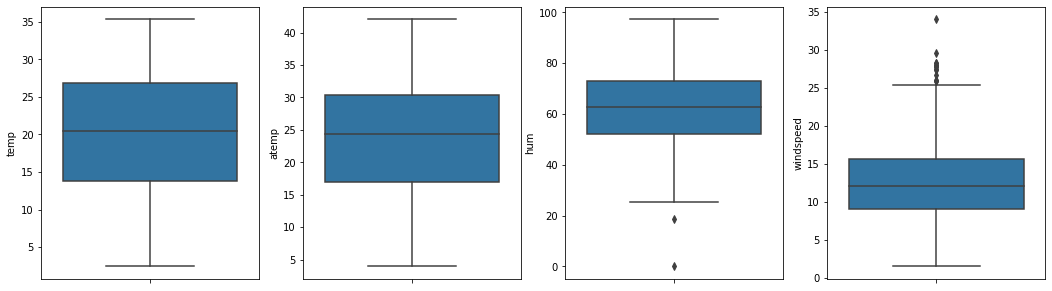

In [30]:
# plotting box plots for few independent but continous variables. (temp,atemp,hum,windspeed)
cols=['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,5))
i=1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data=bike_df)
    i+=1

#### Observations: We can see there are no outliers to handle and we are good to proceed with further analysis

### Step-4 : EDA

In [32]:
# Coverting Categorical columns datatype from int/float to categorical datatypes.
bike_df.weekday=bike_df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df.mnth=bike_df.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)



In [33]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

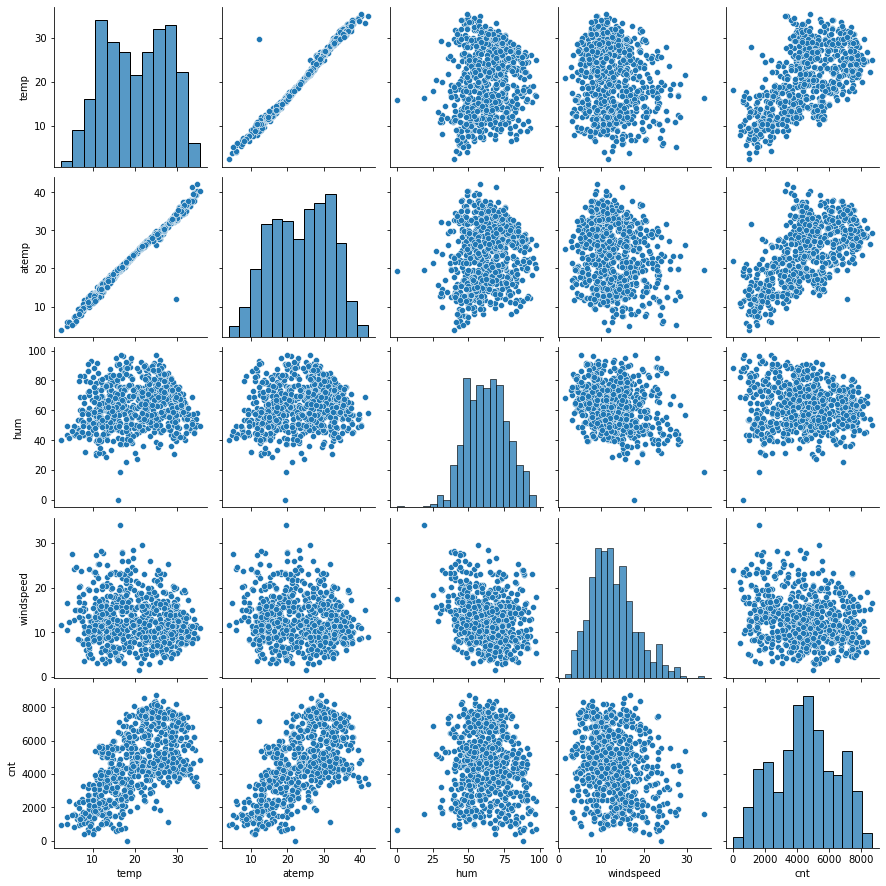

In [34]:
# Checking for linear relationship between independent continous variable
plt.figure(figsize=(15,30))
sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

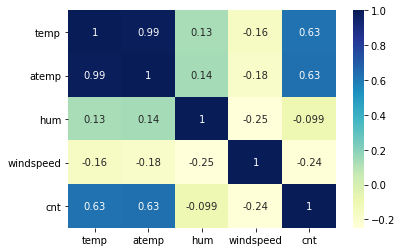

In [37]:
# plotting heatmap for continous variables:
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

#### Observation: 
- atemp and temp are having high correlation (we will drop atemp as it is derived from temp) we will do it later on.
- target variable 'cnt' is also having high correlation with temp and atemp.

<Figure size 1800x1080 with 0 Axes>

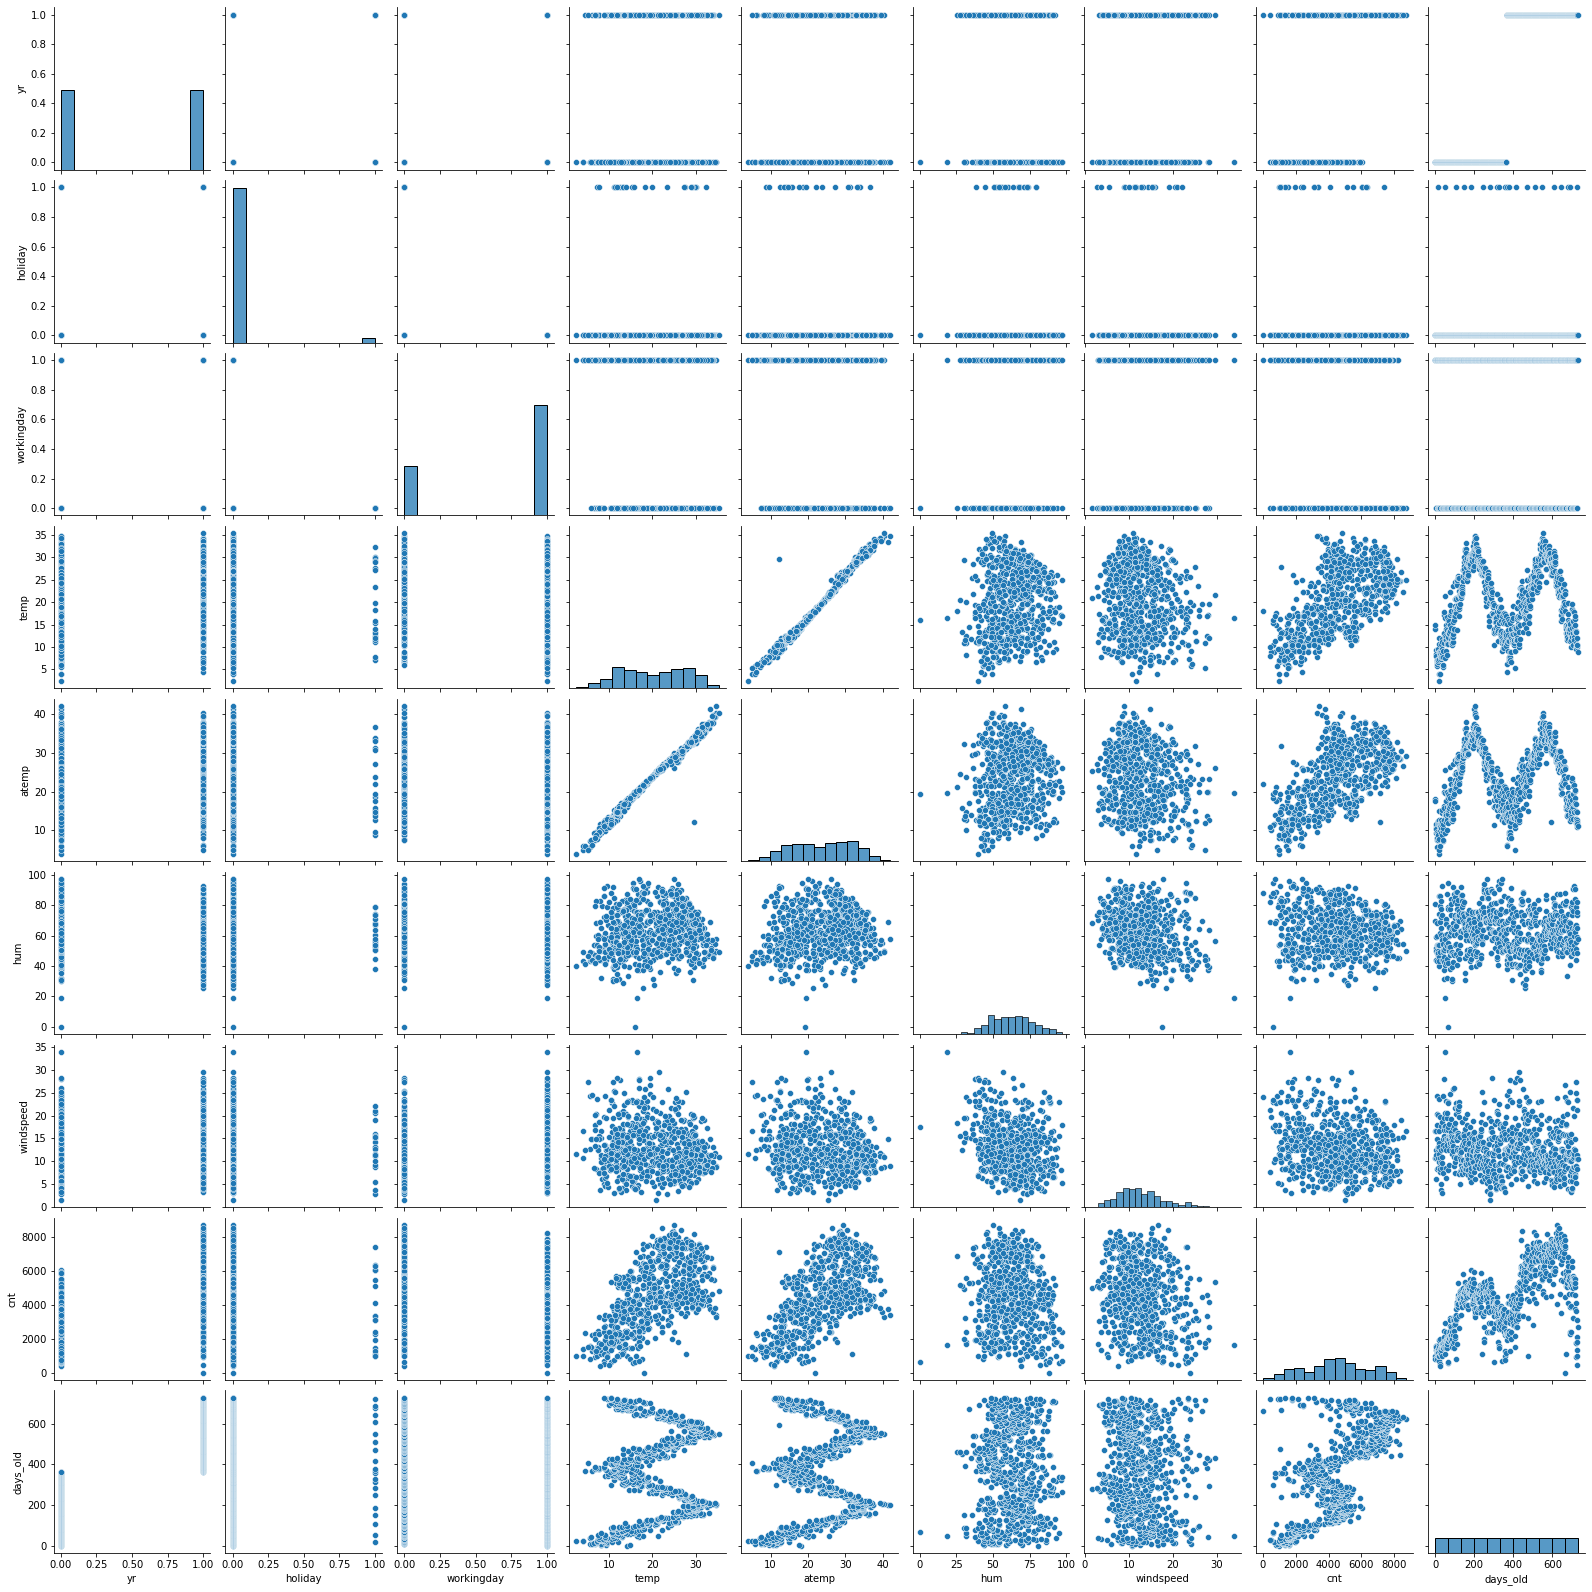

In [35]:
# visualizing Numerical variables for correlation
plt.figure(figsize=(25,15))
sns.pairplot(bike_df)
plt.show()

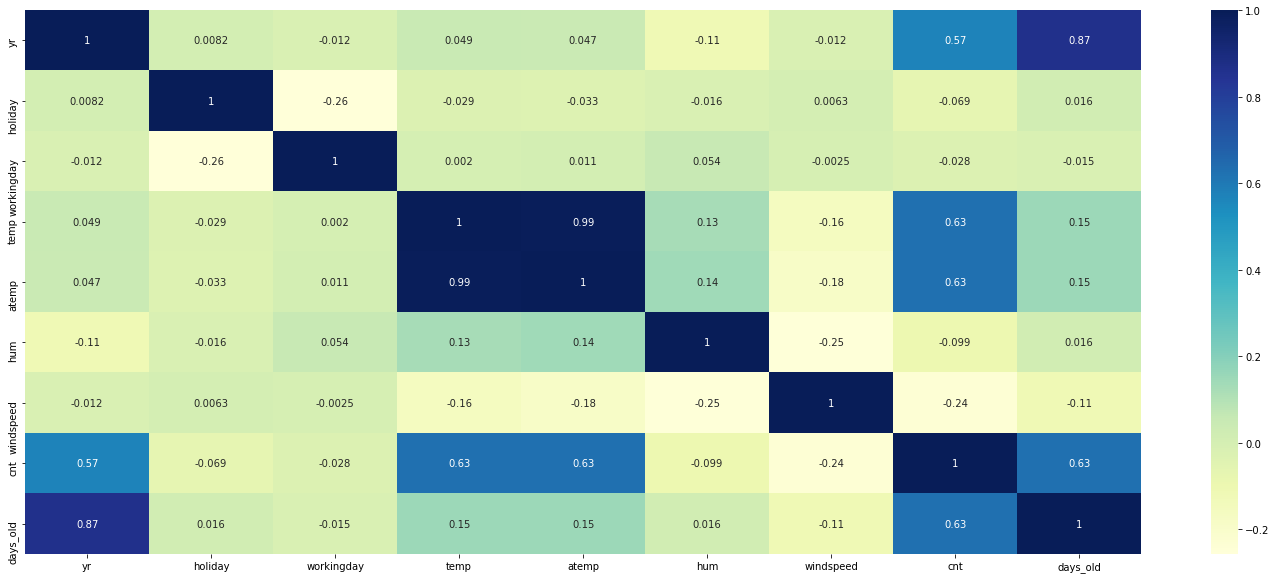

In [38]:
# plotting heatmap for numerical variables
corr=bike_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.show()

#### Observation:
- We observe that target variable 'cnt' has linear relationship with few independent variables.
- atemp,temp and days_old are highly correlated.

#### Analysing categorical variables with target variable

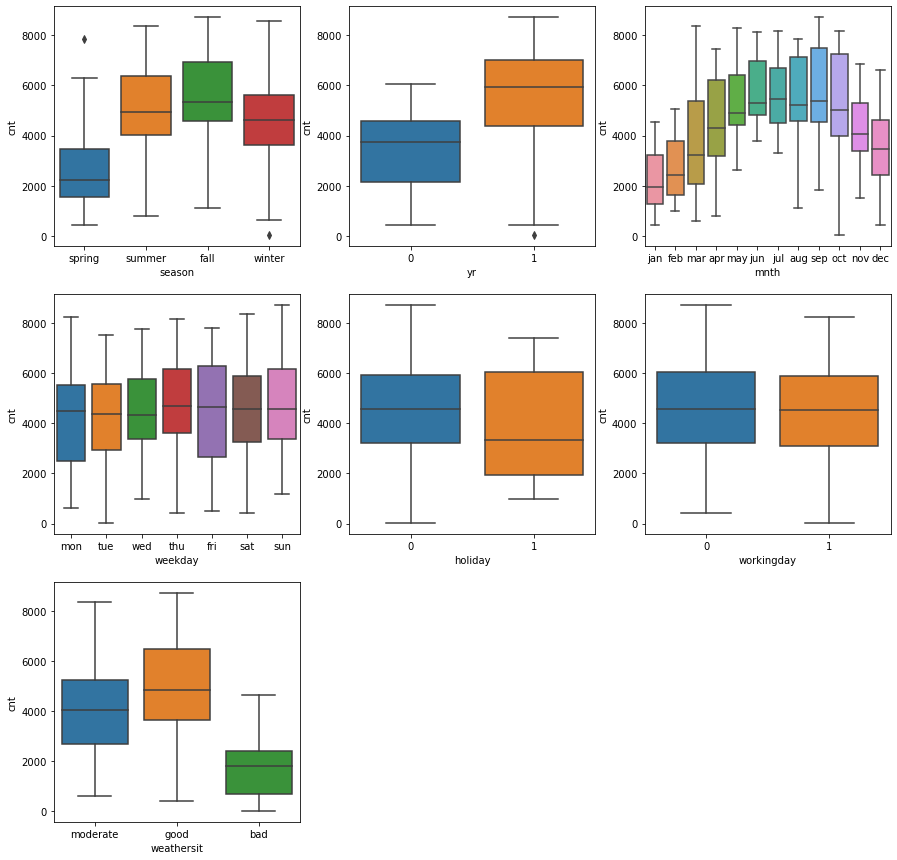

In [42]:
# Plotting boxplot for categorical variables vs target variable
var_cat=['season','yr','mnth','weekday','holiday','workingday','weathersit']
plt.figure(figsize=(15,15))
for i in enumerate(var_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

#### Observations:
- fall has high demands for rental bikes.
- consecutive year is having good growth.
- Demand is growing consecutively till june month while september has high peak and after that demand is declining.
- Demand is decreasing on holiday.
- Also when weather is good we are observing a high demand.

In [43]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


### Step-5 Preparing Data for Linear Regression

In [44]:
# Creating dummy variable for all categorical variables
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])


#### Note:
- Dropping first column as (n-1) dummies can explain 'n' categories.
- Since we don't want to loose information about extreme weather hence not dropping first column of weathersit.

In [45]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [46]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [47]:
bike_df.shape

(730, 32)

#### Splitting data into train and test

In [48]:
# y for target variable 'cnt'
y=bike_df.pop('cnt')

# X is for all independent variables
X=bike_df

# Train and test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
#checking Train and Test shape
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


#### Feature Scaling:
In order to make all feature on same scale for better interpretablity.
- temp, hum, windspeed need to be scaled

In [51]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [52]:
# scaling continous variable
cont_vars=['temp','atemp','hum','windspeed','days_old']

#using normalized scaler
scaler= MinMaxScaler()

#Fit and trannsform training set only
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])


In [53]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Using Recursive Feature Elimination (RFE) Approach

In [55]:
# Building a Linear Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
#Cutting down number of features to 15 using RFE
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [76]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 15),
 ('weekday_sun', False, 16),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

#### Manually eliminating features using statsmodel api

In [58]:
#function that takes columns to be selected for model as a parameter, also we are adding constant explicitly.
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [59]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [75]:
# printing columns selected by RFE, we will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [63]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [66]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']]

In [67]:
X_train_rfe.shape

(511, 15)

### Step-6: Building Models

#### Model-1
- Selected columns: All columns selected by RFE

In [68]:
cols=['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          4.14e-186
Time:                        05:17:23   Log-Likelihood:                -4123.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     495   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2901.8234    342.951     

In [73]:
X_train_rfe.shape

(511, 15)

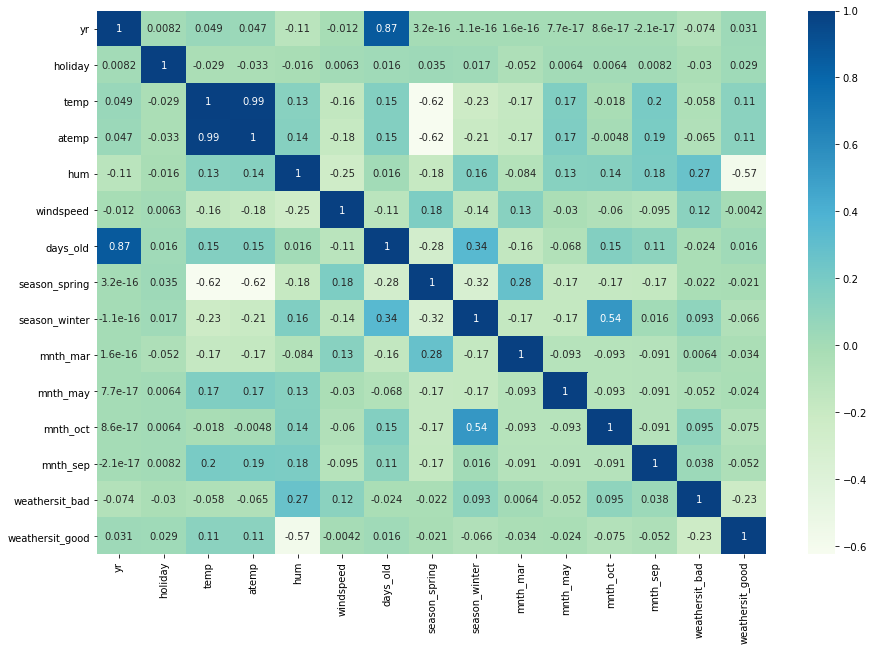

In [74]:
# Verifying correlation of features selected by RFE with target variable
plt.figure(figsize=(15,10))
sns.heatmap(bike_df[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']].corr(),cmap='GnBu',annot=True)
plt.show()

### Model-2

In [77]:
# Dropping 'atemp' as it has high VIF and also it's p-value states that it is insignificant.
# Also 'atemp' and 'temp' are highly correlated so it's better to keep only one of them.

cols=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          5.32e-187
Time:                        21:03:25   Log-Likelihood:                -4124.5
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     496   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2939.8194    341.202     

### Model-3

In [78]:
# Dropping 'days-old' since it has high VIF
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          8.25e-187
Time:                        21:09:48   Log-Likelihood:                -4127.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2818.7964    339.550     

### Model-4

In [79]:
# dropping 'hum' since it has high VIF

cols=['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          7.21e-184
Time:                        21:14:48   Log-Likelihood:                -4137.4
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1717.1649    233.574     

### Model-5

In [80]:
# dropping 'temp' based on high VIF
cols=['yr', 'holiday','windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     162.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.40e-157
Time:                        21:18:58   Log-Likelihood:                -4203.4
No. Observations:                 511   AIC:                             8431.
Df Residuals:                     499   BIC:                             8482.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4131.4487    138.411     

### Model-6

In [81]:
# we found that now 'mnth_may' has insignificant p-value, hence removing it.
cols=['yr', 'holiday','windspeed',
       'season_spring', 'season_winter', 'mnth_mar','mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     178.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          7.05e-158
Time:                        21:22:00   Log-Likelihood:                -4204.5
No. Observations:                 511   AIC:                             8431.
Df Residuals:                     500   BIC:                             8478.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4182.9067    133.942     

### Model-7

In [84]:
# In next 2-3 model we are trying to add and remove several variable to check if our model is mature enough or not.
# Incase there is any significant change we will rework on our model.
# we are dropping windspeed
cols=['yr', 'holiday',
       'season_spring', 'season_winter', 'mnth_mar','mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     185.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.30e-153
Time:                        21:35:28   Log-Likelihood:                -4218.2
No. Observations:                 511   AIC:                             8456.
Df Residuals:                     501   BIC:                             8499.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3681.8106     96.593     

### Model-8

In [90]:
#adding 'temp' to see if it impacts our model statistics or not since it's a good impacting factor for our business.
cols=['yr', 
       'season_spring', 'mnth_mar','mnth_oct','temp',
       'mnth_sep', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     286.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.55e-181
Time:                        21:56:53   Log-Likelihood:                -4154.4
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     502   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1629.1967    154.191     

### Observations:
- VIF is less than 5 which is acceptable criteria.
- P-value is significant for all above listed features.
- high 'R-squared' , 'Adj. R-squared' and 'F-statistic'.
- less difference between 'R-squared' , 'Adj. R-squared'.

So, we can say that $Model-8$ is suitable for our $Final$ model.

In [91]:
### Building a model to select features automatically
def build_model_sk(X,y):
    LR_1 = LinearRegression()
    LR_1.fit(X,y)
    return LR_1

In [92]:
#building final model using sklearn
cols = ['yr', 'season_spring', 'mnth_sep','mnth_mar','mnth_oct'
        ,'weathersit_bad', 'weathersit_good', 'temp']

#Build a model with above columns
LR = build_model_sk(X_train[cols],y_train)
print(LR.intercept_,LR.coef_)

1629.1966686071019 [ 1991.30598653 -1539.13401568   706.52388384   562.6487056
   810.7397096  -1730.09371046   687.11112201  3072.62222301]


### Step-7: Evaluating Model

In [93]:
# Residual Analysis
y_train_pred = LR.predict(X_train[cols])

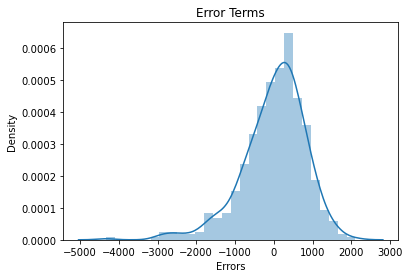

In [94]:
#Plotting a histogram of the error terms:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)

### Observation: Errors are normally distributed around the mean.

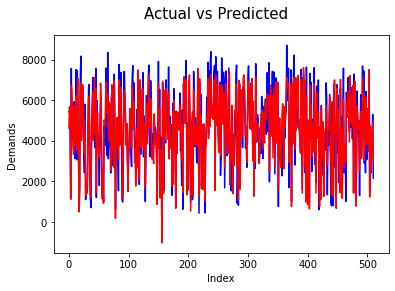

In [95]:
# Actual vs Predicted overllaping graph
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Observation: From above graph its visible that actual(blue) and predicted(red) are overllaping so model seems to be fine.

In [96]:
# showcasing R-squared value:
r2_score(y_train,y_train_pred)

0.8200946871589131

### Observation: R-squared value is same as the value obtained from our final model previously.

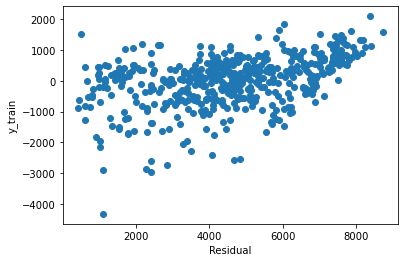

In [97]:
# plotting scatter plot for linearity check:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### predicting values from test data set to actually see how our model is behaving for new data:


In [98]:
# scaling continous variable in X_test
num_vars=['temp','atemp','hum','windspeed','days_old']


# Only using transform as this is test data set
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [99]:
# columns from our final model are
cols = ['yr', 'season_spring', 'mnth_sep','mnth_mar','mnth_oct'
        ,'weathersit_bad', 'weathersit_good', 'temp']

#Predicting the values for test data
y_test_pred = LR.predict(X_test[cols])

In [100]:
# finding R-squared value between test and predicted data set.
r2_score(y_test,y_test_pred)

0.7967085627049397

### Observation: R-squared value for predictions on test data (0.796) is almost same as R-squared value of train data(0.820). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

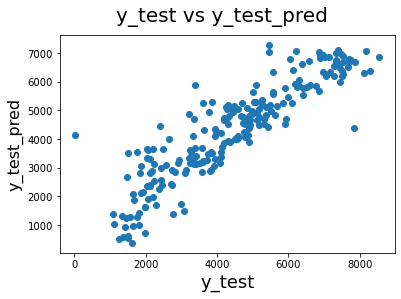

In [101]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

### Observation: We observe that variance of error terms doesnot vary that much as the value of predictor variable changes.

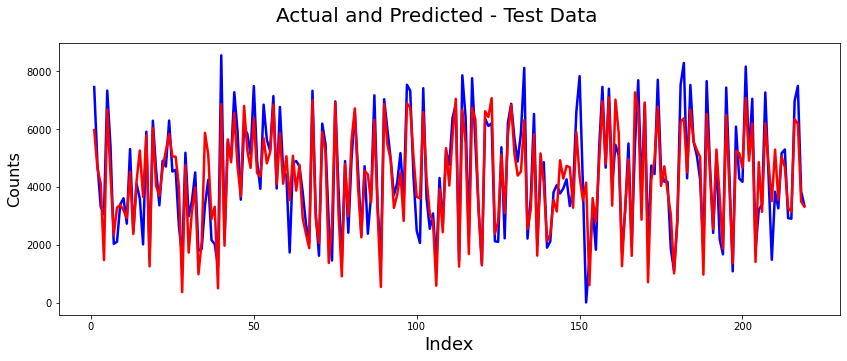

In [102]:
# Plotting Test vs Predicted Test values:

#Function to plot Actual vs Predicted
#Takes Actual and Predicted values as input along with the scale and Title.
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)
    plt.xlabel('Index', fontsize=18)                              
    plt.ylabel('Counts', fontsize=16)
    
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')    

### Observation: predicted values for test data is very close to actual test data.

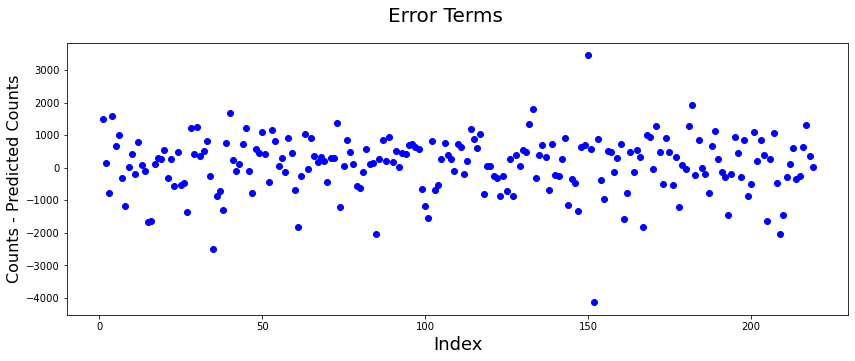

In [103]:
# plotting error terms to showcase absence of mulicollinearity in independent variables.
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)
    plt.xlabel('Index', fontsize=18)                     
    plt.ylabel('Counts - Predicted Counts', fontsize=16)
    
plot_err_terms(y_test,y_test_pred)    

### Observations: Error terms are randomly distributed and there seems to be no pattern i.e, output is well explained by our model.

### Step-8 : Making predictions:

In [104]:
# verifying data before scaling back.
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


### Interpreting model using statsmodel since we will use manual with RFE approach.

In [105]:
cols = ['yr', 'season_spring', 'mnth_sep','mnth_mar','mnth_oct'
        ,'weathersit_bad', 'weathersit_good', 'temp']
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     286.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.55e-181
Time:                        01:08:42   Log-Likelihood:                -4154.4
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     502   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1629.1967    154.191     

### Result interpretation:
- BoomBikes should focus expanding its business around Spring season.
- company should also focus during march, september and october months.
- During bad weather conditions like rain and snow fall company can expect less bookings
    and that time can be better utilised by focusing on marketing or having servicing of bikes/adding inventory for upcoming months.
- Based on previous data we can infer that once situation comes back to normal company can expect rise in demands.

### significant variables for predicting demands in bikes are:
- year (2019)
- temp
- months (march,september,october)
- weathersit (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
- season